In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
# reading the file as dataframe and getting summary #
df = pd.read_json('train.json')

In [6]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [7]:
# grouping the rows based on id and get the rainfall #
df_grouped = df.groupby(['cuisine'])

In [10]:
for cuisine in df_grouped.groups.keys():
    print('{0:15} -> {1:10}'.format(cuisine,len(df_grouped.groups[cuisine])))

plt.style.use(u'ggplot')
all_ingredients = set()
df.ingredients.map(lambda x: [all_ingredients.add(i) for i in list(x)])

brazilian       ->        467
british         ->        804
cajun_creole    ->       1546
chinese         ->       2673
filipino        ->        755
french          ->       2646
greek           ->       1175
indian          ->       3003
irish           ->        667
italian         ->       7838
jamaican        ->        526
japanese        ->       1423
korean          ->        830
mexican         ->       6438
moroccan        ->        821
russian         ->        489
southern_us     ->       4320
spanish         ->        989
thai            ->       1539
vietnamese      ->        825


0        [None, None, None, None, None, None, None, Non...
1        [None, None, None, None, None, None, None, Non...
2        [None, None, None, None, None, None, None, Non...
3                                 [None, None, None, None]
4        [None, None, None, None, None, None, None, Non...
5        [None, None, None, None, None, None, None, Non...
6        [None, None, None, None, None, None, None, Non...
7        [None, None, None, None, None, None, None, Non...
8        [None, None, None, None, None, None, None, Non...
9                     [None, None, None, None, None, None]
10       [None, None, None, None, None, None, None, Non...
11       [None, None, None, None, None, None, None, Non...
12       [None, None, None, None, None, None, None, Non...
13       [None, None, None, None, None, None, None, Non...
14       [None, None, None, None, None, None, None, Non...
15       [None, None, None, None, None, None, None, Non...
16                                [None, None, None, Non

In [11]:
# fill the dataset with a column per ingredient
for ingredient in all_ingredients:
    df[ingredient] = df.ingredients.apply(lambda x: ingredient in x)

/Users/anaelisagentle/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


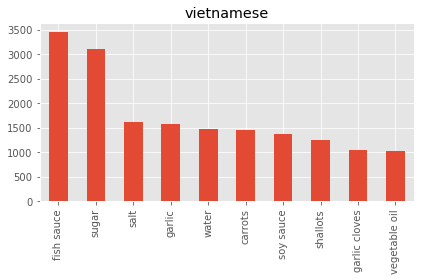

In [12]:
# Lets take a serie with the number of times each ingredient was used
for cuisine in df_grouped.groups.keys():
    df_cuisine = df_grouped.get_group(cuisine);
    s = df_cuisine[list(all_ingredients)].apply(pd.value_counts).fillna(0).transpose()[True]
    # Finally, plot the 10 most used ingredients
    fig = s.sort(inplace=False, ascending=False)[:10].plot(kind='bar', title = cuisine)
    fig = fig.get_figure()
    fig.tight_layout()
    fig.savefig(cuisine + '_10_most_used_ingredients.jpg')

/Users/anaelisagentle/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


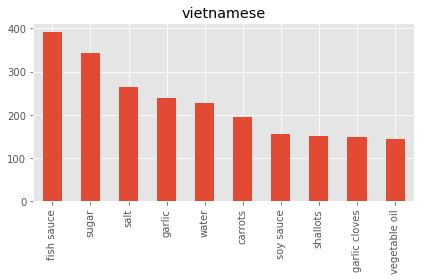

In [14]:
df_cuisine = df_grouped.get_group("vietnamese");
s = df_cuisine[list(all_ingredients)].apply(pd.value_counts).fillna(0).transpose()[True]
# Finally, plot the 10 most used ingredients
fig = s.sort(inplace=False, ascending=False)[:10].plot(kind='bar', title = cuisine)
fig = fig.get_figure()
fig.tight_layout()
#fig.savefig(cuisine + '_10_most_used_ingredients.jpg')